 # Classification Airline Passenger Satisfaction info

## Import libraries
_____________________________

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




## Load Data
____________

In [130]:
df = pd.read_csv('train.csv') #read the data 

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [131]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [132]:
df.sample (10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
77967,77967,19150,Male,Loyal Customer,70,Business travel,Business,3687,0,0,...,4,4,4,4,1,4,5,26,16.0,satisfied
43428,43428,51944,Male,Loyal Customer,37,Business travel,Business,3513,2,2,...,4,4,4,4,1,4,5,0,0.0,satisfied
41380,41380,111700,Male,Loyal Customer,52,Business travel,Business,3073,4,4,...,3,3,3,3,4,3,5,30,17.0,satisfied
58556,58556,27546,Female,Loyal Customer,15,Personal Travel,Eco,954,2,4,...,3,3,4,4,5,4,3,0,0.0,neutral or dissatisfied
76817,76817,124207,Male,Loyal Customer,43,Business travel,Eco,2176,3,2,...,4,4,2,2,3,4,4,0,0.0,satisfied
607,607,60742,Female,Loyal Customer,27,Business travel,Business,628,2,2,...,4,5,3,4,5,5,4,46,51.0,satisfied
103502,103502,82765,Male,Loyal Customer,58,Personal Travel,Eco,409,3,2,...,2,3,5,4,1,3,2,0,0.0,neutral or dissatisfied
93401,93401,52960,Male,Loyal Customer,54,Business travel,Business,2306,2,2,...,5,5,4,5,2,5,3,53,52.0,satisfied
48799,48799,62031,Male,disloyal Customer,40,Business travel,Business,2586,2,2,...,5,4,5,4,3,4,5,0,0.0,neutral or dissatisfied
34542,34542,66914,Female,Loyal Customer,43,Business travel,Business,3137,3,3,...,5,5,5,5,5,5,5,0,0.0,satisfied


In [133]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [134]:
df.shape 

(103904, 25)

chiking for target(Y)
_________

In [135]:
df1['satisfaction'].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [136]:
df['satisfaction'].nunique()

2

In [137]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

# Split the Data
______________


Spilt the data into Train 80% and Test 20%
_____

In [138]:
seed=30

In [139]:
df_train, df_test = train_test_split(df ,test_size=0.2,random_state=seed )

 Train Data EDA

In [140]:
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
99599,99599,48630,Female,Loyal Customer,45,Business travel,Business,1939,0,4,...,4,4,2,2,4,4,4,0,0.0,satisfied
13539,13539,122468,Male,Loyal Customer,52,Business travel,Business,2205,4,4,...,4,4,4,4,3,4,1,14,8.0,neutral or dissatisfied
51615,51615,63750,Male,Loyal Customer,44,Personal Travel,Eco,1660,2,2,...,2,4,5,4,1,3,2,0,0.0,neutral or dissatisfied
56520,56520,1277,Male,Loyal Customer,52,Personal Travel,Eco,89,3,4,...,1,1,2,3,1,5,1,16,13.0,neutral or dissatisfied
7010,7010,120091,Male,Loyal Customer,29,Business travel,Business,683,5,5,...,4,5,3,5,5,5,4,0,4.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46220,46220,4885,Female,Loyal Customer,11,Personal Travel,Eco,500,0,5,...,5,5,2,4,3,5,5,0,0.0,satisfied
98804,98804,98824,Male,disloyal Customer,25,Business travel,Eco,763,3,3,...,4,1,1,3,2,3,4,78,99.0,neutral or dissatisfied
48045,48045,26791,Male,disloyal Customer,36,Business travel,Business,226,4,4,...,1,3,4,4,3,4,1,0,0.0,neutral or dissatisfied
70053,70053,8890,Male,Loyal Customer,15,Personal Travel,Eco,539,1,5,...,2,4,5,4,4,4,2,21,14.0,neutral or dissatisfied


In [141]:
df_train.sample (10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
91880,91880,103328,Male,Loyal Customer,38,Personal Travel,Eco,1139,1,4,...,1,5,3,5,3,4,1,14,10.0,neutral or dissatisfied
70260,70260,35006,Male,Loyal Customer,56,Personal Travel,Eco,1182,2,5,...,3,5,2,4,5,5,3,0,9.0,neutral or dissatisfied
62187,62187,15953,Male,Loyal Customer,14,Personal Travel,Eco,723,1,5,...,2,2,2,2,1,3,2,32,32.0,neutral or dissatisfied
59805,59805,129420,Male,disloyal Customer,26,Business travel,Business,236,3,4,...,1,3,3,4,3,4,1,0,0.0,neutral or dissatisfied
19916,19916,93380,Male,Loyal Customer,50,Business travel,Business,1638,2,2,...,4,4,4,4,3,4,5,7,6.0,satisfied
41016,41016,23190,Female,Loyal Customer,65,Personal Travel,Eco,223,1,2,...,3,3,1,3,3,3,3,37,33.0,neutral or dissatisfied
78301,78301,4963,Male,Loyal Customer,56,Personal Travel,Eco,931,4,1,...,1,3,2,2,2,1,1,0,17.0,neutral or dissatisfied
67434,67434,105262,Male,Loyal Customer,43,Business travel,Business,2106,5,1,...,4,4,4,4,3,4,3,0,0.0,satisfied
90043,90043,121277,Male,Loyal Customer,57,Business travel,Business,1814,2,3,...,5,5,5,5,3,5,5,0,0.0,satisfied
73753,73753,64080,Male,Loyal Customer,37,Personal Travel,Eco,919,1,5,...,5,3,4,5,2,4,2,188,184.0,neutral or dissatisfied


In [142]:
df_train.shape 

(83123, 25)

In [143]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83123 entries, 99599 to 38693
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         83123 non-null  int64  
 1   id                                 83123 non-null  int64  
 2   Gender                             83123 non-null  object 
 3   Customer Type                      83123 non-null  object 
 4   Age                                83123 non-null  int64  
 5   Type of Travel                     83123 non-null  object 
 6   Class                              83123 non-null  object 
 7   Flight Distance                    83123 non-null  int64  
 8   Inflight wifi service              83123 non-null  int64  
 9   Departure/Arrival time convenient  83123 non-null  int64  
 10  Ease of Online booking             83123 non-null  int64  
 11  Gate location                      83123 non-null 

# Handele the traine data 
_______

In [144]:
df_train=df_train.drop(['Unnamed: 0','id'], axis=1)

In [145]:
df_train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             245
satisfaction                           0
dtype: int64

In [146]:
df_train['Arrival Delay in Minutes'].mean()

15.18810782113468

In [147]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())

In [148]:
df_train.duplicated().sum() 

0

## Visualization of the data
_________

In [149]:
df_train.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000,83123.000000
mean,39.413640,1190.164082,2.728511,3.057108,2.755206,2.974628,3.206345,3.253335,3.443151,3.365482,3.388172,3.354884,3.632232,3.306810,3.642927,3.290281,14.807574,15.188108
std,15.092303,998.396339,1.327192,1.525147,1.398030,1.277405,1.329621,1.348535,1.317575,1.331953,1.286404,1.314733,1.180796,1.265402,1.174510,1.311887,38.450820,38.882619
min,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [150]:
df_train.corr()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099048,0.018496,0.038492,0.025711,0.001231,0.022824,0.209464,0.159845,0.076895,0.059456,0.041611,-0.046050,0.037247,-0.048431,0.051988,-0.009967,-0.011626
Flight Distance,0.099048,1.000000,0.004634,-0.019952,0.065333,0.003869,0.056299,0.217012,0.157529,0.128752,0.110821,0.135994,0.063171,0.074079,0.059516,0.093071,0.003973,-0.000120
Inflight wifi service,0.018496,0.004634,1.000000,0.344267,0.716543,0.336494,0.133401,0.456090,0.121088,0.207043,0.120896,0.160354,0.119385,0.043653,0.110487,0.131067,-0.017364,-0.018699
Departure/Arrival time convenient,0.038492,-0.019952,0.344267,1.000000,0.436776,0.445505,0.005390,0.068031,0.011455,-0.006082,0.067122,0.013310,0.072367,0.093633,0.072332,0.014299,0.004656,0.002806
Ease of Online booking,0.025711,0.065333,0.716543,0.436776,1.000000,0.457714,0.030501,0.402273,0.027779,0.045469,0.038555,0.107364,0.037959,0.011901,0.035669,0.014848,-0.002988,-0.004852
Gate location,0.001231,0.003869,0.336494,0.445505,0.457714,1.000000,-0.001104,0.000505,0.002149,0.003520,-0.028130,-0.006523,0.002954,-0.033707,0.001138,-0.004141,0.006256,0.006270
Food and drink,0.022824,0.056299,0.133401,0.005390,0.030501,-0.001104,1.000000,0.232874,0.573763,0.621413,0.058949,0.035512,0.034390,0.086838,0.033685,0.656560,-0.029091,-0.032124
Online boarding,0.209464,0.217012,0.456090,0.068031,0.402273,0.000505,0.232874,1.000000,0.419174,0.284012,0.156716,0.126095,0.083254,0.205962,0.076429,0.329270,-0.018451,-0.021466
Seat comfort,0.159845,0.157529,0.121088,0.011455,0.027779,0.002149,0.573763,0.419174,1.000000,0.609599,0.131058,0.107630,0.075681,0.193182,0.069735,0.678405,-0.027534,-0.029408
Inflight entertainment,0.076895,0.128752,0.207043,-0.006082,0.045469,0.003520,0.621413,0.284012,0.609599,1.000000,0.421217,0.303219,0.376993,0.119331,0.404227,0.690284,-0.027709,-0.031220


<AxesSubplot:>

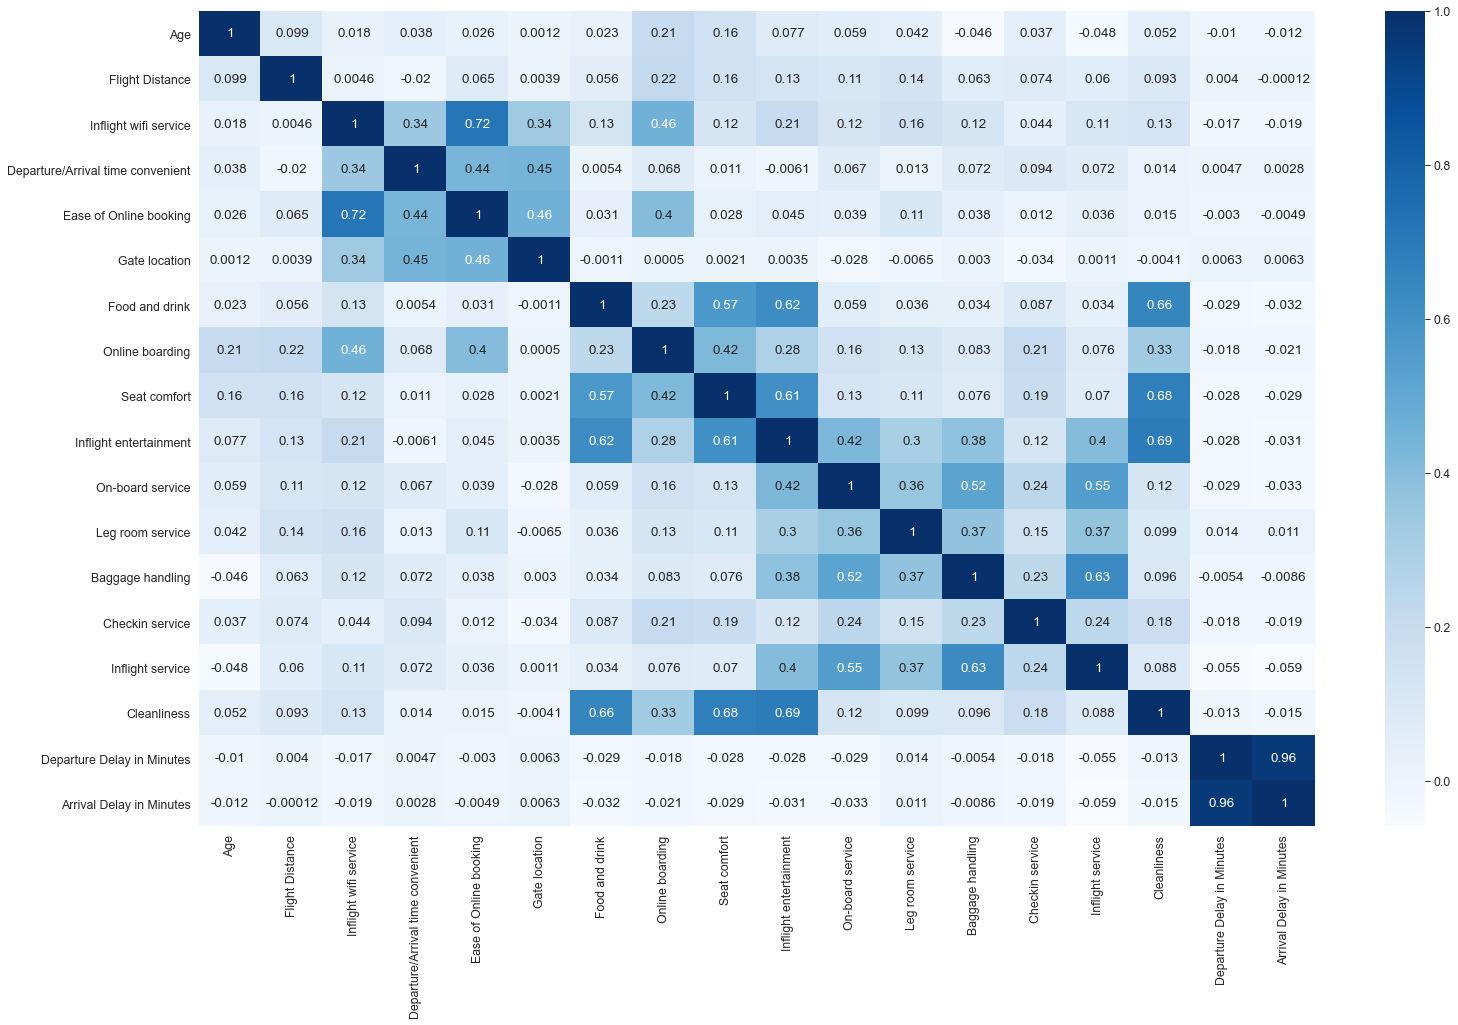

In [151]:
sns.set_style('whitegrid')
plt.figure(figsize=(25,15))
sns.set_context('paper', font_scale=1.4)

crash_mx = df_train.corr()
sns.heatmap(crash_mx, annot=True, cmap='Blues')

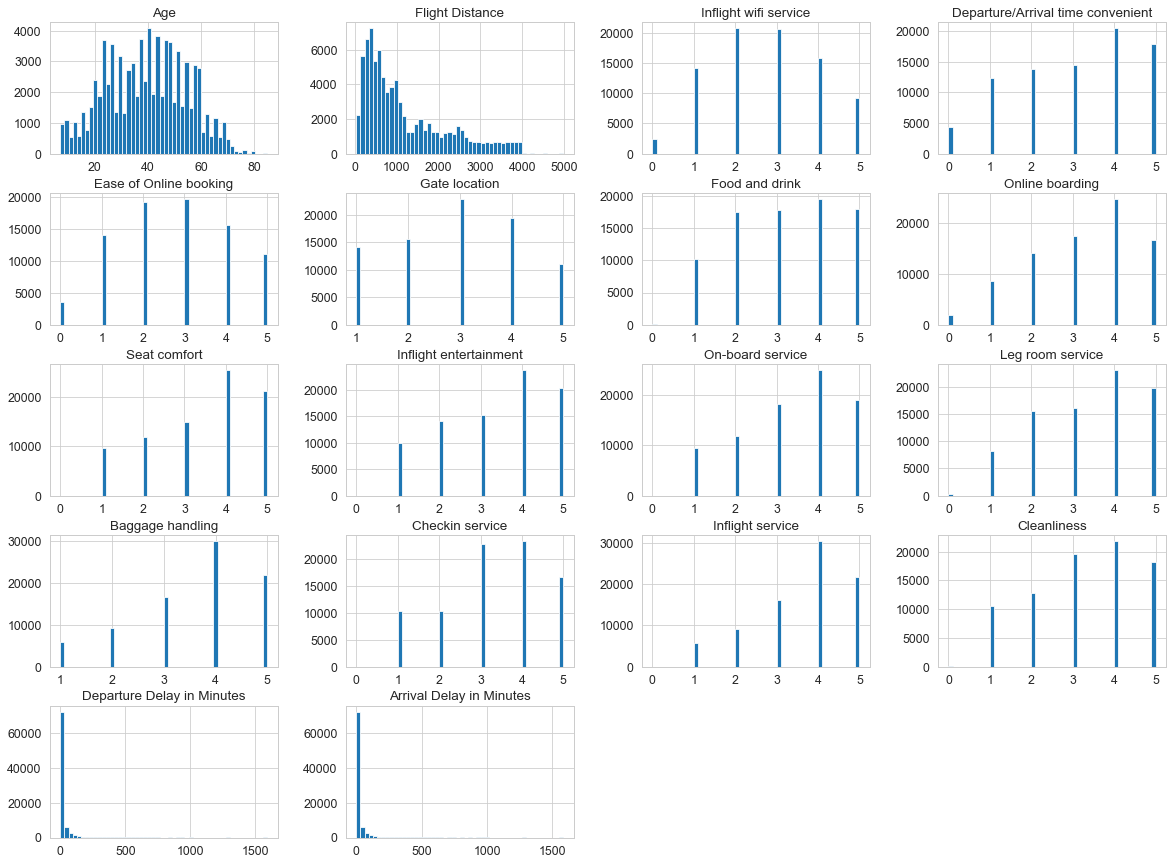

In [152]:
df_train.hist(bins=50, figsize=(20,15));

In [153]:
df_train['satisfaction'].value_counts()

neutral or dissatisfied    46945
satisfied                  36178
Name: satisfaction, dtype: int64

Text(0.5, 1.0, 'Neutral or Dissatisfied vs Statisfied')

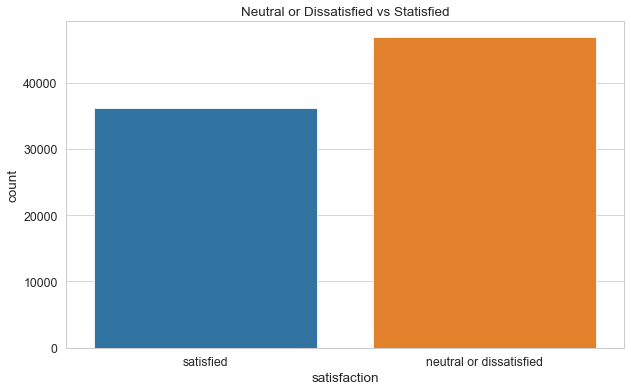

In [154]:
plt.figure(figsize=(10,6))
sns.countplot(x='satisfaction', data = df_train).set_title('Neutral or Dissatisfied vs Statisfied')

Text(0.5, 1.0, 'Histogram of Flight Distance')

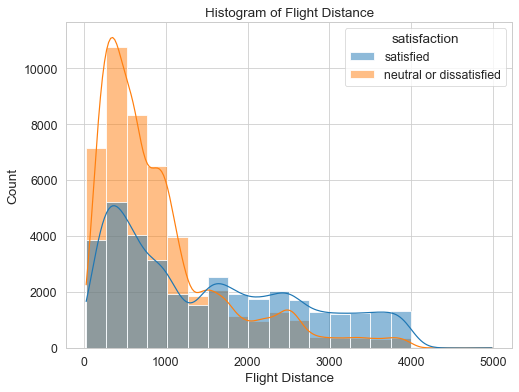

In [155]:
plt.figure(figsize=(8,6))
sns.histplot(x='Flight Distance', data = df_train, bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance')

Text(0.5, 1.0, 'Histogram of Flight Distance by Eco and Eco Plus Class')

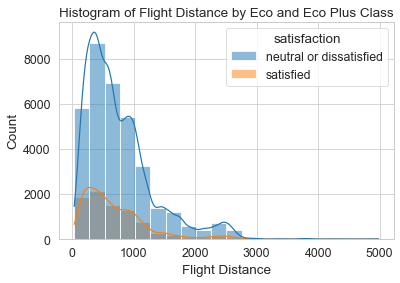

In [156]:
sns.histplot(x='Flight Distance', data =  df_train[ df_train['Class'] != 'Business'],
bins = 20, hue ='satisfaction',
kde = True).set_title('Histogram of Flight Distance by Eco and Eco Plus Class')

Text(0.5, 1.0, 'Histogram of Flight Distance by Business Class')

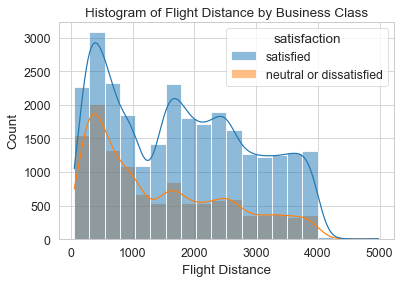

In [157]:
sns.histplot(x='Flight Distance', data =  df_train[ df_train['Class'] == 'Business'],bins = 20, hue ='satisfaction', 
             kde = True).set_title('Histogram of Flight Distance by Business Class')

<AxesSubplot:title={'center':'Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival'}, xlabel='satisfaction', ylabel='count'>

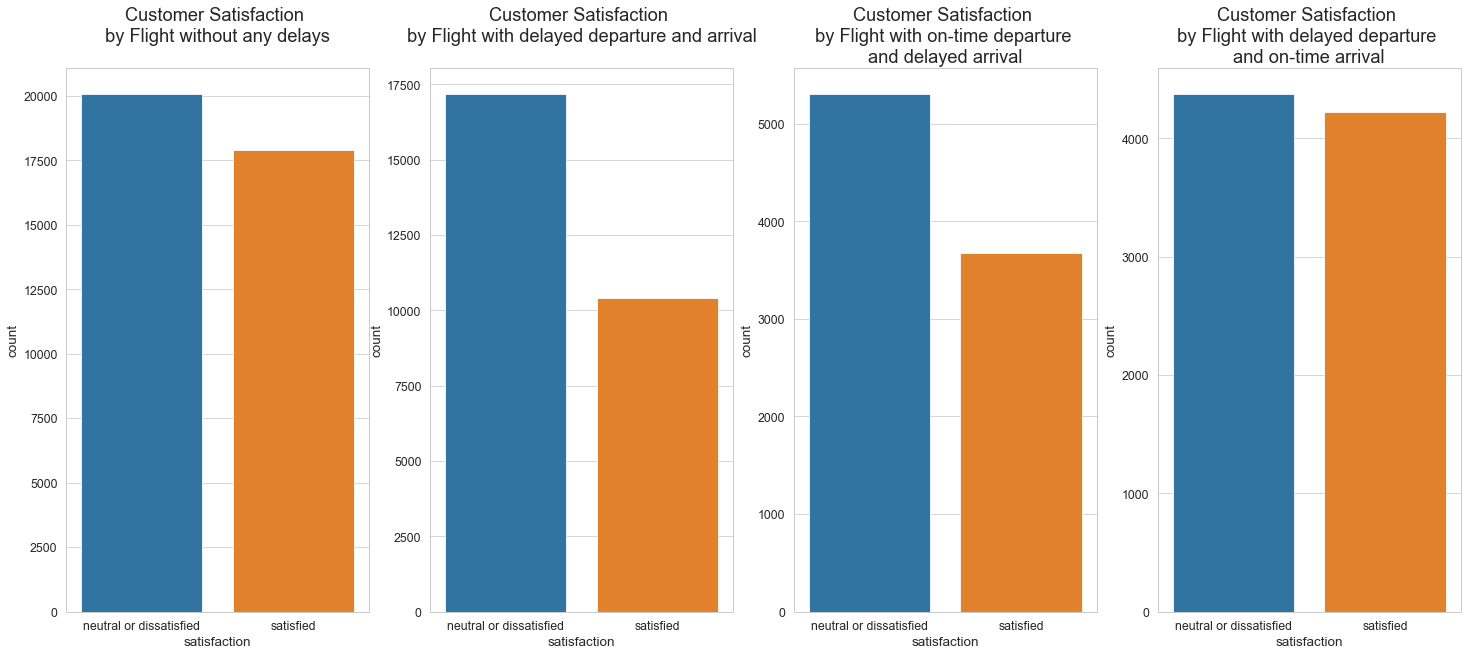

In [158]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,4, figsize=(25,10))
sns.set_context('paper', font_scale=1.9)


ax[0].set_title('Customer Satisfaction \nby Flight without any delays\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure Delay in Minutes']==0) & ( df_train['Arrival Delay in Minutes']==0 )], 
              ax=ax[0])

ax[1].set_title('Customer Satisfaction \nby Flight with delayed departure and arrival\n')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure Delay in Minutes'] > 0) & ( df_train['Arrival Delay in Minutes'] > 0)], 
              ax=ax[1])

ax[2].set_title('Customer Satisfaction \nby Flight with on-time departure \nand delayed arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure Delay in Minutes'] == 0) & ( df_train['Arrival Delay in Minutes'] > 0)], 
              ax=ax[2])

ax[3].set_title('Customer Satisfaction \nby Flight with delayed departure \nand on-time arrival')
sns.countplot(x='satisfaction', order = ['neutral or dissatisfied', 'satisfied'], 
              data =  df_train[( df_train['Departure Delay in Minutes'] > 0) & ( df_train['Arrival Delay in Minutes'] == 0)], 
              ax=ax[3])

[Text(0.5, 1.0, 'Online boarding rates')]

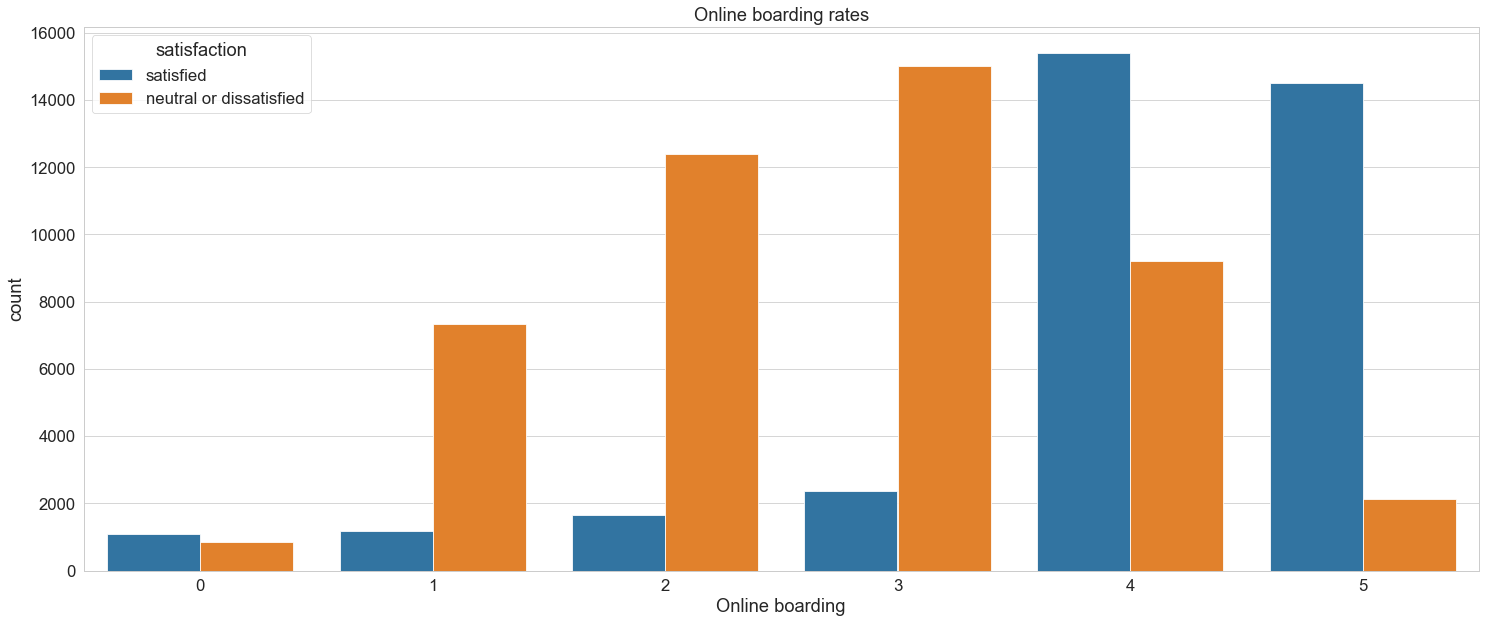

In [159]:
plt.figure(figsize=(25,10))
sns.countplot(x='Online boarding',hue="satisfaction", 
              data=df_train).set(title='Online boarding rates')
    

[Text(0.5, 1.0, 'satisfaction with costumer types')]

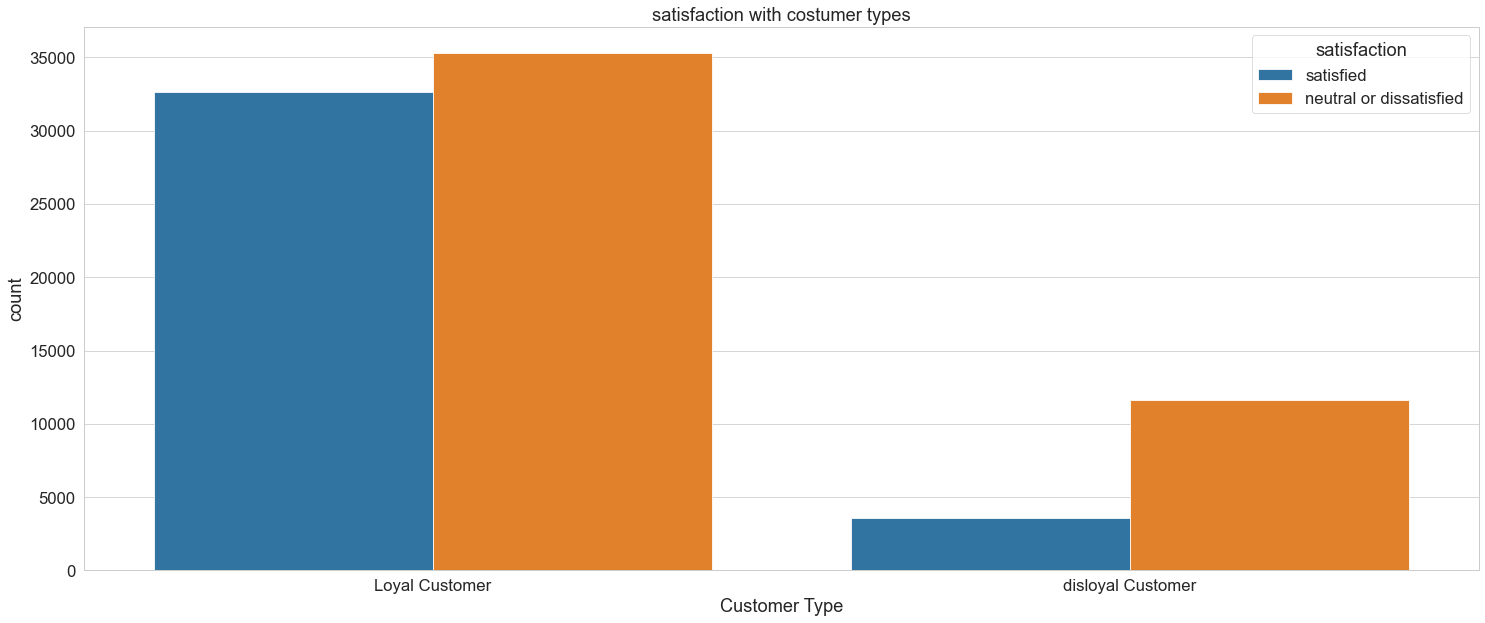

In [160]:
plt.figure(figsize=(25,10))
sns.countplot(x='Customer Type',hue="satisfaction",data=df_train).set(title='satisfaction with costumer types')

[Text(0.5, 1.0, 'food and drink rates')]

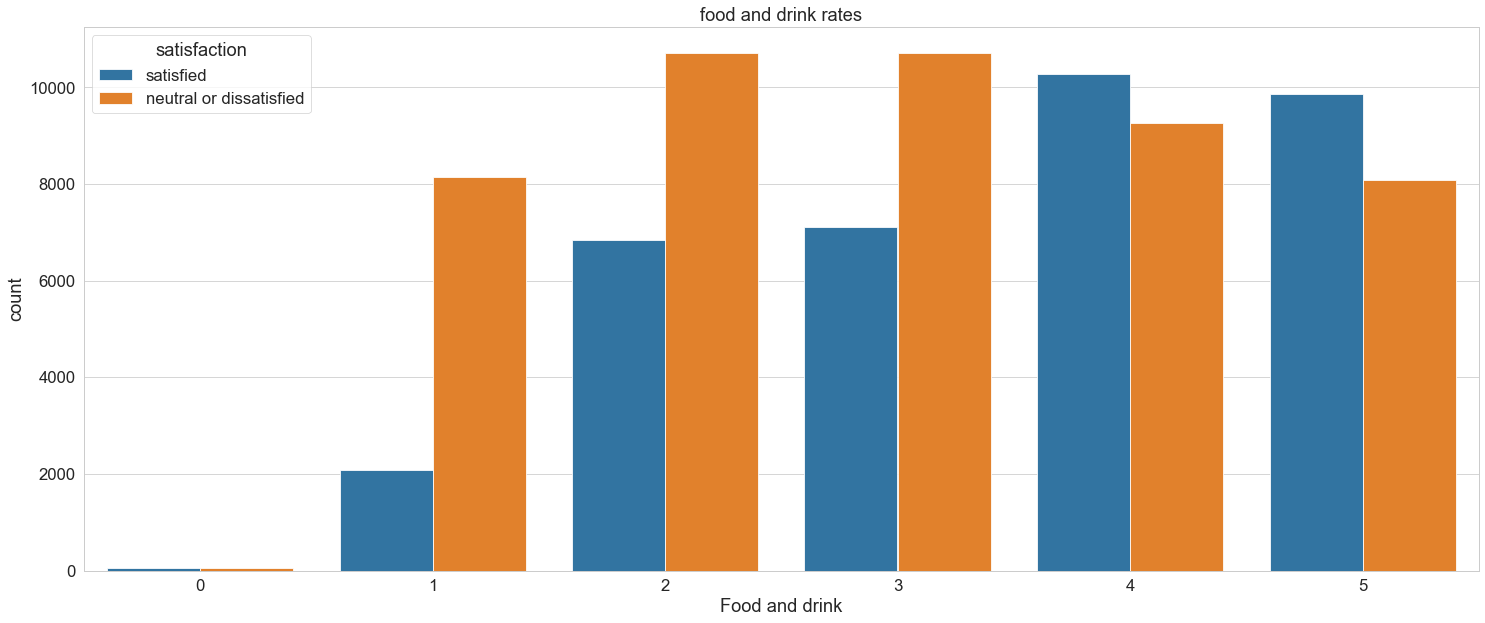

In [161]:
plt.figure(figsize=(25,10))
sns.countplot(x='Food and drink',hue="satisfaction",
              data=df_train).set(title='food and drink rates')

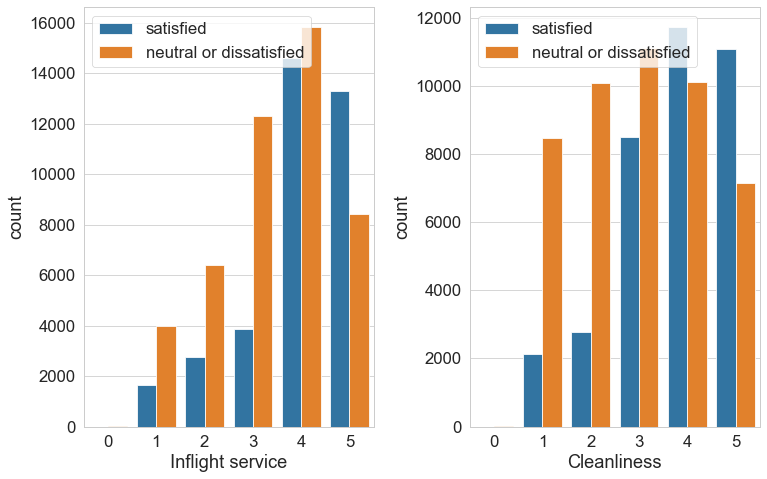

In [162]:
plt.figure(figsize=(11,7))
plt.subplot(1,2,1)
sns.countplot('Inflight service',data=df_train,hue='satisfaction')
plt.legend(loc='upper left')
plt.subplot(1,2,2)
sns.countplot('Cleanliness',data=df_train,hue='satisfaction')
plt.legend(loc='upper left')
plt.tight_layout()